In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

pd.set_option('display.max_columns',5000)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_isnull = train.isnull().sum()
train_isnull=train_isnull[train_isnull>0]
train_isnull.sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [5]:
train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [6]:
train_isnull = train.isnull().sum()
train_isnull=train_isnull[train_isnull>0]
train_isnull.sort_values(ascending = False)

LotFrontage     259
GarageCond       81
GarageQual       81
GarageFinish     81
GarageYrBlt      81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

In [7]:
train[['LotFrontage','GarageCond','GarageQual','GarageFinish','GarageYrBlt','GarageType','BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea','MasVnrType','Electrical']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   GarageCond    1379 non-null   object 
 2   GarageQual    1379 non-null   object 
 3   GarageFinish  1379 non-null   object 
 4   GarageYrBlt   1379 non-null   float64
 5   GarageType    1379 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   BsmtExposure  1422 non-null   object 
 8   BsmtFinType1  1423 non-null   object 
 9   BsmtCond      1423 non-null   object 
 10  BsmtQual      1423 non-null   object 
 11  MasVnrArea    1452 non-null   float64
 12  MasVnrType    1452 non-null   object 
 13  Electrical    1459 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


In [8]:
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])

In [9]:
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])

In [10]:
train['GarageYrBlt']=train['GarageYrBlt'].fillna(1980)

In [11]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [12]:
train_isnull = train.isnull().sum()
train_isnull=train_isnull[train_isnull>0]
train_isnull.sort_values(ascending = False)

Series([], dtype: int64)

In [13]:
# Temporal Variables (Date Time Variables)
# Basically we are capturing the difference of years here

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    train[feature] = train['YrSold'] - train[feature]
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
train_isnull = train.isnull().sum()
train_isnull=train_isnull[train_isnull>0]
train_isnull.sort_values(ascending = False)

Series([], dtype: int64)

In [15]:
categorical_features = [feature for feature in train.columns if train[feature].dtype == 'O']
len(categorical_features)

38

In [16]:
# Let's map the categories to some specific values 
for feature in categorical_features:
    labels_ordered = train.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered)}
    train[feature] = train[feature].map(labels_ordered)

In [17]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,1,1,0,0,16,4,4,4,6,7,5,5,5,1,2,11,12,2,196.0,2,3,5,2,2,0,5,706,4,0,150,856,5,4,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,4,5.0,1,2,548,2,4,2,0,61,0,0,0,0,0,2,2008,4,4,208500
1,2,20,3,80.0,9600,1,0,1,1,1,0,20,2,4,4,5,6,8,31,31,1,2,4,5,1,0.0,1,3,2,2,2,3,3,978,4,0,284,1262,5,4,1,4,1262,0,0,1262,0,1,2,0,3,1,1,6,6,1,4,31.0,1,2,460,2,4,2,298,0,0,0,0,0,0,5,2007,4,4,181500
2,3,60,3,68.0,11250,1,1,1,1,0,0,16,4,4,4,6,7,5,7,6,1,2,11,12,2,162.0,2,3,5,2,2,1,5,486,4,0,434,920,5,4,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,7.0,1,2,608,2,4,2,0,42,0,0,0,0,0,9,2008,4,4,223500
3,4,70,3,60.0,9550,1,1,1,1,2,0,17,4,4,4,6,7,5,91,36,1,2,5,8,1,0.0,1,3,1,1,3,0,3,216,4,0,540,756,5,3,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,1,8.0,0,3,642,2,4,2,0,35,272,0,0,0,0,2,2006,4,1,140000
4,5,60,3,84.0,14260,1,1,1,1,1,0,24,4,4,4,6,8,5,8,8,1,2,11,12,2,350.0,2,3,5,2,2,2,5,655,4,0,490,1145,5,4,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,8.0,1,3,836,2,4,2,192,84,0,0,0,0,0,12,2008,4,4,250000


In [18]:
train.shape

(1460, 76)

In [19]:
X = train.drop("SalePrice",axis=1)   #Feature Matrix
y = train["SalePrice"]

In [20]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,0,1,1,0,0,16,4,4,4,6,7,5,5,5,1,2,11,12,2,196.0,2,3,5,2,2,0,5,706,4,0,150,856,5,4,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,4,5.0,1,2,548,2,4,2,0,61,0,0,0,0,0,2,2008,4,4
1,2,20,3,80.0,9600,1,0,1,1,1,0,20,2,4,4,5,6,8,31,31,1,2,4,5,1,0.0,1,3,2,2,2,3,3,978,4,0,284,1262,5,4,1,4,1262,0,0,1262,0,1,2,0,3,1,1,6,6,1,4,31.0,1,2,460,2,4,2,298,0,0,0,0,0,0,5,2007,4,4
2,3,60,3,68.0,11250,1,1,1,1,0,0,16,4,4,4,6,7,5,7,6,1,2,11,12,2,162.0,2,3,5,2,2,1,5,486,4,0,434,920,5,4,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,7.0,1,2,608,2,4,2,0,42,0,0,0,0,0,9,2008,4,4
3,4,70,3,60.0,9550,1,1,1,1,2,0,17,4,4,4,6,7,5,91,36,1,2,5,8,1,0.0,1,3,1,1,3,0,3,216,4,0,540,756,5,3,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,1,8.0,0,3,642,2,4,2,0,35,272,0,0,0,0,2,2006,4,1
4,5,60,3,84.0,14260,1,1,1,1,1,0,24,4,4,4,6,8,5,8,8,1,2,11,12,2,350.0,2,3,5,2,2,2,5,655,4,0,490,1145,5,4,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,8.0,1,3,836,2,4,2,192,84,0,0,0,0,0,12,2008,4,4


In [21]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [22]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=40)

X_train.shape, X_test.shape

((1022, 75), (438, 75))

In [23]:
X_train.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,1.000000,0.027110,0.011650,-0.032785,-0.046380,0.026533,-0.062028,-0.010703,NaN,-0.028998,-0.033135,-0.007306,-0.024221,0.051611,-0.023997,-0.033040,-0.028802,0.027967,0.034466,0.005971,0.012314,-0.052123,-0.027794,-0.022877,-0.024969,-0.076744,-0.007259,0.014535,-0.011401,-0.047173,0.021694,0.017212,-0.002416,-0.028855,0.027723,-0.020792,0.007683,-0.029886,-0.050844,-0.021620,-0.029936,0.066854,-0.016016,0.018567,-0.042126,-0.000799,-0.012724,-0.011681,0.005667,0.001172,0.054061,0.017674,0.016645,0.030149,0.014033,-0.050013,-0.039590,0.002574,-0.002531,0.013724,0.010906,-0.014238,-0.056183,0.015248,-0.038721,-0.009733,0.013873,-0.054788,-0.044381,0.072020,-0.015335,0.010419,-0.012277,-0.042956,-0.007726
MSSubClass,0.027110,1.000000,-0.215739,-0.345842,-0.119425,-0.044637,-0.099921,-0.016116,NaN,-0.066731,0.004249,-0.081540,-0.004085,-0.019570,-0.716510,-0.010474,0.006626,-0.058201,-0.017753,-0.027902,-0.134375,-0.025177,-0.033673,-0.028454,0.023412,0.037255,-0.000572,-0.035343,0.049584,0.058865,-0.003755,0.076829,0.139884,-0.064559,0.046707,-0.065632,-0.170298,-0.258254,-0.031585,-0.048799,-0.096403,0.041848,-0.259917,0.308189,0.030348,0.061275,0.019055,-0.030236,0.126188,0.164262,-0.028787,0.262950,-0.022191,0.025032,0.037196,-0.061444,-0.085424,-0.087729,-0.035624,-0.051643,-0.103386,0.037127,-0.000985,-0.068816,-0.008663,-0.001460,-0.012145,-0.053383,0.001458,0.023578,-0.005480,-0.023290,-0.040505,-0.056297,-0.025211
MSZoning,0.011650,-0.215739,1.000000,0.269871,0.134173,0.115681,0.186610,0.075553,NaN,0.086359,0.024235,0.554208,0.147742,0.129852,0.171724,0.229584,0.267988,-0.130059,-0.450437,-0.262750,0.073409,0.008385,0.151355,0.180166,0.141982,0.125385,0.295213,0.114316,0.285327,0.303417,0.127719,0.092965,0.041378,0.181895,-0.033531,0.036368,0.059811,0.259803,0.022443,0.205727,0.241266,0.146490,0.255168,0.006730,-0.089719,0.183404,0.132628,0.039028,0.282620,0.174811,0.122661,-0.129876,0.235533,0.135393,0.064981,0.177476,0.304873,-0.289976,0.275796,0.235962,0.231958,0.096512,0.094979,0.279591,0.105074,0.143697,-0.207025,0.045184,0.023260,0.027259,-0.001556,-0.006544,0.004235,0.173213,0.136517
LotFrontage,-0.032785,-0.345842,0.269871,1.000000,0.294903,-0.062945,0.121069,0.018949,NaN,0.091077,0.027010,0.243173,-0.005738,0.038615,0.218765,0.114947,0.241286,-0.062287,-0.100814,-0.075533,0.150785,0.011552,0.068487,0.077890,0.138105,0.202328,0.175329,0.033687,0.089030,0.156839,0.028120,0.162076,0.004485,0.251863,-0.028347,0.068474,0.143231,0.425829,0.037218,0.071487,0.089403,0.064817,0.448397,0.107777,0.062786,0.420848,0.098298,0.022777,0.198144,0.072599,0.249020,0.017567,0.191419,0.349350,0.015161,0.252552,0.223388,-0.049860,0.220676,0.280010,0.358222,0.057391,0.041765,0.091014,0.070771,0.168752,0.054617,0.081679,0.039913,0.238684,0.000115,-0.001393,0.014208,0.114767,0.079145
LotArea,-0.046380,-0.119425,0.134173,0.294903,1.000000,-0.190915,0.324260,0.206121,NaN,0.183885,0.501407,0.191079,0.012264,0.040079,0.052448,-0.003124,0.107686,-0.009821,-0.014176,-0.015929,0.091935,0.149450,0.017836,0.023051,0.003674,0.103731,0.061721,0.022221,-0.022004,0.080276,0.029700,0.251544,-0.025509,0.234506,-0.094169,0.111394,-0.009619,0.273532,-0.024780,-

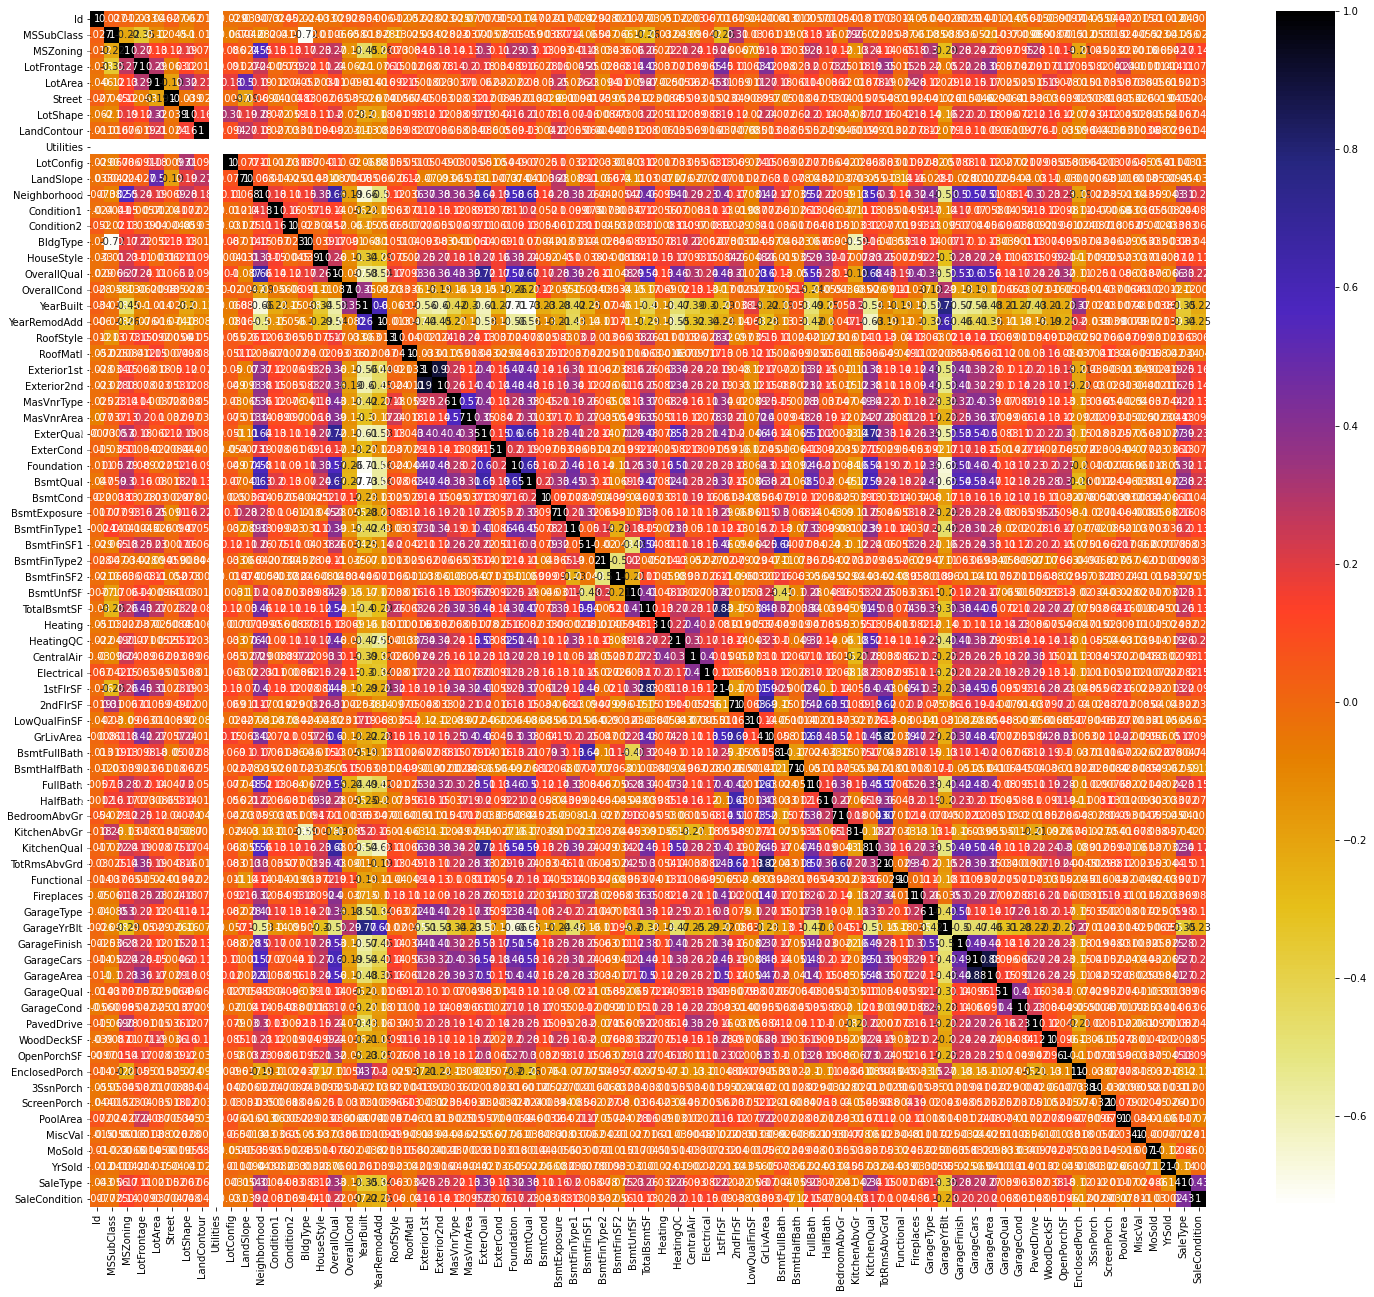

In [24]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(25,22))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [25]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [26]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

10

In [27]:
corr_features

{'1stFlrSF',
 'BldgType',
 'BsmtQual',
 'ExterQual',
 'Exterior2nd',
 'Foundation',
 'GarageArea',
 'GarageYrBlt',
 'KitchenQual',
 'TotRmsAbvGrd'}

In [28]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [29]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
498,499,20,3,65.0,7800,1,0,1,1,0,0,6,4,4,5,5,7,42,5,4,2,8,2,89.0,3,2,0,3,450,4,0,414,864,5,4,1,4,0,0,899,0,0,1,0,3,1,6,0,4,2,1,2,4,2,64,0,0,0,0,0,0,6,2009,4,4
8,9,50,1,51.0,6120,1,0,1,1,0,0,5,0,4,2,7,5,77,58,1,2,10,1,0.0,3,2,0,4,0,4,0,952,952,5,3,1,2,752,0,1774,0,0,2,0,2,2,3,2,1,0,2,1,4,2,90,0,205,0,0,0,0,4,2008,4,1
309,310,20,3,90.0,12378,1,1,1,1,0,0,23,4,4,5,9,5,3,2,1,2,11,1,0.0,3,2,3,5,1274,4,0,622,1896,5,4,1,4,0,0,1944,1,0,2,0,3,1,6,3,4,2,3,2,4,2,208,175,0,0,0,0,0,11,2006,4,4
957,958,20,3,70.0,7420,1,0,1,1,0,0,6,4,4,5,5,5,45,45,4,2,4,1,0.0,3,2,0,0,417,4,0,640,1057,5,2,1,4,0,0,1057,0,0,1,0,3,1,6,0,1,2,2,2,4,2,0,0,0,0,0,0,0,4,2007,4,4
1022,1023,50,1,52.0,9439,1,0,1,1,0,0,5,4,4,2,5,5,77,57,1,2,5,1,0.0,3,2,0,2,324,4,0,588,912,5,3,1,3,336,0,1248,0,0,1,0,2,1,6,0,1,0,1,1,1,2,0,0,192,0,0,0,0,3,2007,4,4


In [30]:
X_train.shape

(1022, 65)

In [31]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1258,1259,80,3,59.000000,9587,1,1,1,1,0,0,14,4,4,4,7,5,3,3,1,2,11,3,182.0,3,2,3,5,655,4,0,201,856,5,4,1,4,0,0,1166,1,0,2,0,2,1,6,0,4,2,2,2,4,2,212,0,0,0,0,0,0,7,2008,4,4
1041,1042,60,3,70.049958,9130,1,0,1,1,0,0,13,2,4,6,6,8,42,8,4,2,8,2,252.0,3,2,0,5,400,2,64,336,800,5,3,1,4,832,0,1632,0,1,1,1,4,1,6,0,4,0,2,2,4,2,0,40,0,0,0,0,0,7,2008,4,4
1181,1182,120,1,64.000000,5587,1,1,3,1,0,1,17,4,4,5,8,5,0,0,4,2,12,3,186.0,3,2,3,5,1480,4,0,120,1600,5,4,1,4,0,0,1652,1,1,2,0,2,1,6,1,4,2,2,2,4,2,162,53,0,153,0,0,0,11,2008,8,5
1108,1109,60,3,70.049958,8063,1,0,1,1,0,0,14,4,4,6,6,5,7,7,1,2,11,1,0.0,3,2,0,4,0,4,0,924,924,5,4,1,4,742,0,1690,0,0,2,1,3,1,6,1,4,1,2,2,4,2,100,48,0,0,0,0,0,11,2007,4,1
554,555,60,3,85.000000,10625,1,0,1,1,0,0,23,4,4,6,7,5,5,4,1,2,11,2,292.0,3,2,0,5,866,4,0,132,998,5,4,1,4,1040,0,2046,1,0,2,1,3,1,6,1,5,1,3,2,4,2,320,62,0,0,0,0,0,8,2008,4,4


In [32]:
X_test.shape

(438, 65)

R^2 is: 
 0.835997222364445
RMSE is: 
 853904769.4203142


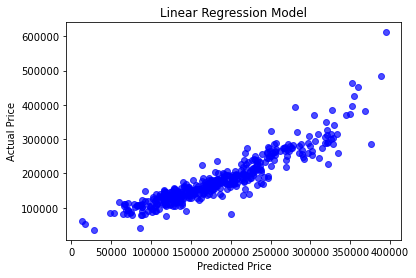

In [33]:

from sklearn import linear_model
lr = linear_model.LinearRegression()

model = lr.fit(X_train, y_train)

print ("R^2 is: \n", model.score(X_test, y_test))

predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [34]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_estimators=1000)

In [35]:
model1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [36]:
predictions=model1.predict(X_test)

R^2 is: 
 0.8675588762433666
RMSE is: 
 689574340.5912755


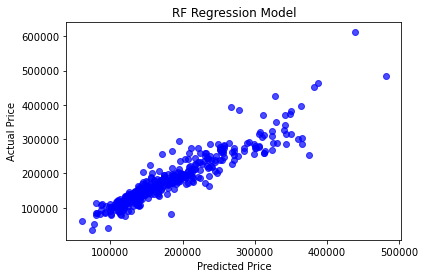

In [37]:
print ("R^2 is: \n", model1.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('RF Regression Model')
plt.show()

In [38]:
features = X_test.columns
len(features)

65

In [39]:
features

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterCond', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype=

In [40]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [41]:
dataset = train.append(test, ignore_index=True)

In [42]:
df=dataset[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterCond', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition','SalePrice']]

In [43]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,BrkFace,196.0,TA,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,854,0,1710,1.0,0.0,2,1,3,1,Typ,0,Attchd,RFn,2.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,None,0.0,TA,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,0,0,1262,0.0,1.0,2,0,3,1,Typ,1,Attchd,RFn,2.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,BrkFace,162.0,TA,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,866,0,1786,1.0,0.0,2,1,3,1,Typ,1,Attchd,RFn,2.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,None,0.0,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,756,0,1717,1.0,0.0,1,0,3,1,Typ,1,Detchd,Unf,3.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,BrkFace,350.0,TA,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1053,0,2198,1.0,0.0,2,1,4,1,Typ,1,Attchd,RFn,3.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [44]:
df.shape

(2919, 65)

In [45]:
df_null = df.isnull().sum()
df_null=df_null[df_null>0]
df_null.sort_values(ascending = False)

SalePrice       1459
LotFrontage      486
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
BsmtFinSF2         1
SaleType           1
BsmtFinSF1         1
TotalBsmtSF        1
Electrical         1
Exterior1st        1
GarageCars         1
BsmtUnfSF          1
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyl

In [47]:
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
train['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])

In [48]:
df['BsmtFinSF1']=df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean())
df['BsmtFinSF2']=df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean())
df['BsmtUnfSF']=df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean())
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean())
df['BsmtFullBath']=df['BsmtFullBath'].fillna(df['BsmtFullBath'].mean())
df['BsmtHalfBath']=df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mean())
df['GarageCars']=df['GarageCars'].fillna(df['GarageCars'].mean())

In [49]:
df_null = df.isnull().sum()
df_null=df_null[df_null>0]
df_null.sort_values(ascending = False)

SalePrice       1459
LotFrontage      486
BsmtExposure      82
MasVnrType        24
MSZoning           4
Utilities          2
Exterior1st        1
dtype: int64

In [50]:
df[['LotFrontage','BsmtExposure','MasVnrType','MSZoning','Utilities','Exterior1st']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   2433 non-null   float64
 1   BsmtExposure  2837 non-null   object 
 2   MasVnrType    2895 non-null   object 
 3   MSZoning      2915 non-null   object 
 4   Utilities     2917 non-null   object 
 5   Exterior1st   2918 non-null   object 
dtypes: float64(1), object(5)
memory usage: 137.0+ KB


In [51]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['Utilities']=df['Utilities'].fillna(df['Utilities'].mode()[0])
df['Exterior1st']=df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

In [52]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [53]:
df_null = df.isnull().sum()
df_null=df_null[df_null>0]
df_null.sort_values(ascending = False)

SalePrice    1459
dtype: int64

In [54]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,BrkFace,196.0,TA,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,854,0,1710,1.0,0.0,2,1,3,1,Typ,0,Attchd,RFn,2.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,None,0.0,TA,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,0,0,1262,0.0,1.0,2,0,3,1,Typ,1,Attchd,RFn,2.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,BrkFace,162.0,TA,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,866,0,1786,1.0,0.0,2,1,3,1,Typ,1,Attchd,RFn,2.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,None,0.0,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,756,0,1717,1.0,0.0,1,0,3,1,Typ,1,Detchd,Unf,3.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,BrkFace,350.0,TA,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1053,0,2198,1.0,0.0,2,1,4,1,Typ,1,Attchd,RFn,3.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [55]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
len(categorical_features)

32

In [56]:
# Let's map the categories to some specific values 
for feature in categorical_features:
    labels_ordered = df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered)}
    df[feature] = df[feature].map(labels_ordered)

In [57]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,0,1,1,0,0,16,4,4,6,7,5,2003,2003,1,2,11,2,196.0,3,2,0,5,706.0,4,0.0,150.0,856.0,5,4,1,4,854,0,1710,1.0,0.0,2,1,3,1,6,0,4,1,2.0,2,4,2,0,61,0,0,0,0,0,2,2008,4,4,208500.0
1,20,3,80.0,9600,1,0,1,1,1,0,20,2,4,5,6,8,1976,1976,1,2,4,1,0.0,3,2,3,3,978.0,4,0.0,284.0,1262.0,5,4,1,4,0,0,1262,0.0,1.0,2,0,3,1,6,1,4,1,2.0,2,4,2,298,0,0,0,0,0,0,5,2007,4,4,181500.0
2,60,3,68.0,11250,1,1,1,1,0,0,16,4,4,6,7,5,2001,2002,1,2,11,2,162.0,3,2,1,5,486.0,4,0.0,434.0,920.0,5,4,1,4,866,0,1786,1.0,0.0,2,1,3,1,6,1,4,1,2.0,2,4,2,0,42,0,0,0,0,0,9,2008,4,4,223500.0
3,70,3,60.0,9550,1,1,1,1,2,0,17,4,4,6,7,5,1915,1970,1,2,5,1,0.0,3,3,0,3,216.0,4,0.0,540.0,756.0,5,3,1,4,756,0,1717,1.0,0.0,1,0,3,1,6,1,1,0,3.0,2,4,2,0,35,272,0,0,0,0,2,2006,4,1,140000.0
4,60,3,84.0,14260,1,1,1,1,1,0,24,4,4,6,8,5,2000,2000,1,2,11,2,350.0,3,2,2,5,655.0,4,0.0,490.0,1145.0,5,4,1,4,1053,0,2198,1.0,0.0,2,1,4,1,6,1,4,1,3.0,2,4,2,192,84,0,0,0,0,0,12,2008,4,4,250000.0


In [58]:
df_null = df.isnull().sum()
df_null=df_null[df_null>0]
df_null.sort_values(ascending = False)

SalePrice    1459
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   int64  
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int64  
 5   LotShape       2919 non-null   int64  
 6   LandContour    2919 non-null   int64  
 7   Utilities      2919 non-null   int64  
 8   LotConfig      2919 non-null   int64  
 9   LandSlope      2919 non-null   int64  
 10  Neighborhood   2919 non-null   int64  
 11  Condition1     2919 non-null   int64  
 12  Condition2     2919 non-null   int64  
 13  HouseStyle     2919 non-null   int64  
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyl

In [60]:
df.shape

(2919, 65)

In [61]:
df_Train=df.iloc[:1460,:]
df_Test=df.iloc[1460:,:]

In [62]:
df_Train.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,60,3,62.0,7917,1,0,1,1,0,0,14,4,4,6,6,5,1999,2000,1,2,11,1,0.0,3,2,0,4,0.0,4,0.0,953.0,953.0,5,4,1,4,694,0,1647,0.0,0.0,2,1,3,1,6,1,4,1,2.0,2,4,2,0,40,0,0,0,0,0,8,2007,4,4,175000.0
1456,20,3,85.0,13175,1,0,1,1,0,0,13,4,4,5,6,6,1978,1988,1,2,9,3,119.0,3,2,0,3,790.0,2,163.0,589.0,1542.0,5,2,1,4,0,0,2073,1.0,0.0,2,0,3,1,3,2,4,0,2.0,2,4,2,349,0,0,0,0,0,0,2,2010,4,4,210000.0
1457,70,3,66.0,9042,1,0,1,1,0,0,17,4,4,6,7,9,1941,2006,1,2,12,1,0.0,2,3,0,5,275.0,4,0.0,877.0,1152.0,5,4,1,4,1152,0,2340,0.0,0.0,2,0,4,1,6,2,4,1,1.0,2,4,2,0,60,0,0,0,0,2500,5,2010,4,4,266500.0
1458,20,3,68.0,9717,1,0,1,1,0,0,10,4,4,5,5,6,1950,1996,4,2,4,1,0.0,3,2,1,5,49.0,2,1029.0,0.0,1078.0,5,3,1,3,0,0,1078,1.0,0.0,1,0,2,1,6,0,4,0,1.0,2,4,2,366,0,112,0,0,0,0,4,2010,4,4,142125.0
1459,20,3,75.0,9937,1,0,1,1,0,0,4,4,4,5,5,6,1965,1965,1,2,8,1,0.0,3,2,0,1,830.0,1,290.0,136.0,1256.0,5,3,1,4,0,0,1256,1.0,0.0,1,1,3,1,6,0,4,2,1.0,2,4,2,736,68,0,0,0,0,0,6,2008,4,4,147500.0


In [63]:
df_Test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1460,20,2,80.0,11622,1,0,1,1,0,0,10,2,4,5,5,6,1961,1961,1,2,11,1,0.0,3,2,0,0,468.0,1,144.0,270.0,882.0,5,2,1,4,0,0,896,0.0,0.0,1,0,2,1,6,0,4,0,1.0,2,4,2,140,0,0,0,120,0,0,6,2010,4,4,NaN
1461,20,3,81.0,14267,1,1,1,1,2,0,10,4,4,5,6,6,1958,1958,4,2,5,2,108.0,3,2,0,3,923.0,4,0.0,406.0,1329.0,5,2,1,4,0,0,1329,0.0,0.0,1,1,3,1,6,0,4,0,1.0,2,4,2,393,36,0,0,0,0,12500,6,2010,4,4,NaN
1462,60,3,74.0,13830,1,1,1,1,0,0,14,4,4,6,5,5,1997,1998,1,2,11,1,0.0,3,2,0,5,791.0,4,0.0,137.0,928.0,5,3,1,4,701,0,1629,0.0,0.0,2,1,3,1,6,1,4,2,2.0,2,4,2,212,34,0,0,0,0,0,3,2010,4,4,NaN
1463,60,3,78.0,9978,1,1,1,1,0,0,14,4,4,6,6,6,1998,1998,1,2,11,2,20.0,3,2,0,5,602.0,4,0.0,324.0,926.0,5,4,1,4,678,0,1604,0.0,0.0,2,1,3,1,6,1,4,2,2.0,2,4,2,360,36,0,0,0,0,0,6,2010,4,4,NaN
1464,120,3,43.0,5005,1,1,3,1,0,0,22,4,4,5,8,5,1992,1992,1,2,8,1,0.0,3,2,0,3,263.0,4,0.0,1017.0,1280.0,5,4,1,4,0,0,1280,0.0,0.0,2,0,2,1,6,0,4,1,2.0,2,4,2,0,82,0,0,144,0,0,1,2010,4,4,NaN


In [64]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [65]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [66]:
df_Test.shape

(1459, 64)

In [67]:
df_Train.shape

(1460, 65)

In [68]:
rf = RandomForestRegressor()
#Fit
rf.fit(X_train, y_train)

RandomForestRegressor()

In [69]:
y_pred=rf.predict(df_Test)
y_pred

array([123738.5 , 151079.  , 188899.19, ..., 152379.4 , 121014.6 ,
       205267.75])

In [70]:
sub_df=pd.read_csv('sample_submission.csv')

In [71]:
sub_df['Id']=test['Id']
sub_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [72]:
##Create Sample Submission file and Submit
pred=pd.DataFrame(y_pred)
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('submission_RandomForestRegressor1.csv',index=False)

In [73]:
sub_df=pd.read_csv('submission_RandomForestRegressor1.csv')
sub_df.head()

,Id,SalePrice
0,1461,123738.50
1,1462,151079.00
2,1463,188899.19
3,1464,187443.15
4,1465,196346.44


kaggle score - 0.14174